<a href="https://colab.research.google.com/github/IsabelJnz/NLP-Sentiment-Analysis/blob/main/ChatGPT_NLP_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on the Tweets

###Installations

In [ ]:
%pip install plotly_express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [203]:
!pip install transformers==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.0/884.0 KB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.5 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=0a66b3a9d1fd210e8e3ffc9da569adbdc2be2ec896fd3cdbe1d15e23cfeba9f3
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


###Imports

In [204]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly_express as px
import numpy as np
import nltk
from textblob import TextBlob
import torch
from transformers import pipeline

from google.colab import drive

In [153]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [154]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


###Reading the cleaned tweets csv

In [155]:
with open('/content/drive/MyDrive/NLP/cleaned_tweets_time_emoji', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)
    data = [row for row in reader]

df = pd.DataFrame(data, columns=header)

In [156]:
df.head()

,clean_text,clean_hashtags,date,emojis
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06 17:26:19+00:00,
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06 17:26:18+00:00,
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06 17:26:16+00:00,
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06 17:26:12+00:00,
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06 17:26:05+00:00,


##Subjectivity and Polarity

The **subjectivity** attribute is a float value between 0 and 1 that represents the degree of subjectivity of the text, where 0 is the most objective text and 1 is the most subjective text. The subjectivity score is calculated based on the presence of subjective language in the text, such as opinions, evaluations, and beliefs.

The **polarity** attribute is a float value between -1 and 1 that represents the degree of sentiment polarity, where -1 is the most negative sentiment, 0 is neutral sentiment, and 1 is the most positive sentiment. The polarity score is calculated based on a set of pre-defined polarity values for common words in the English language, and takes into account the context of the words in the text.

Together, the polarity and subjectivity attributes provide a measure of the sentiment of a piece of text, as well as the degree of objectivity or subjectivity in the language used. For example, a text with a high polarity and a low subjectivity score might be a factual statement with a strong sentiment, while a text with a low polarity and a high subjectivity score might be a subjective opinion with a weak sentiment.

In [157]:
# using TextBlob to calculate subjectivity and polarity in the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [158]:
df['subjectivity'] = df['clean_text'].apply(getSubjectivity)
df['polarity'] = df['clean_text'].apply(getPolarity)

In [159]:
df.head()

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06 17:26:19+00:00,,0.0,0.00
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06 17:26:18+00:00,,0.6,-0.05
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06 17:26:16+00:00,,0.0,0.00
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06 17:26:12+00:00,,0.0,0.00
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06 17:26:05+00:00,,0.0,0.00


In [160]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [161]:
sub_grouped = df.groupby('date').agg({'subjectivity': 'mean'}) 

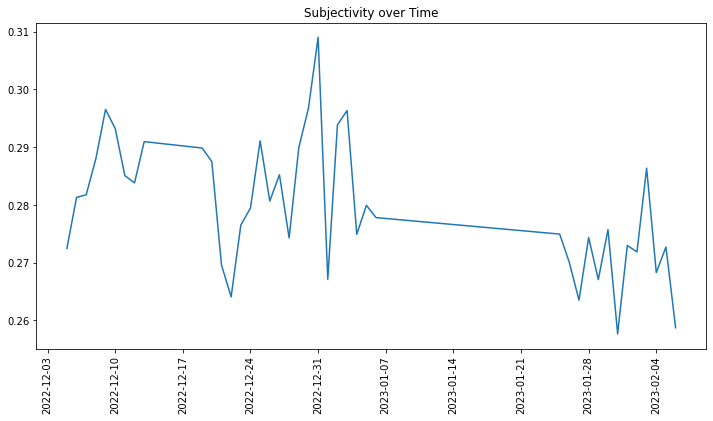

In [162]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sub_grouped.index, sub_grouped['subjectivity'])
plt.xticks(rotation=90) 
plt.title('Subjectivity over Time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

In [163]:
pol_grouped = df.groupby('date').agg({'polarity': 'mean'}) 

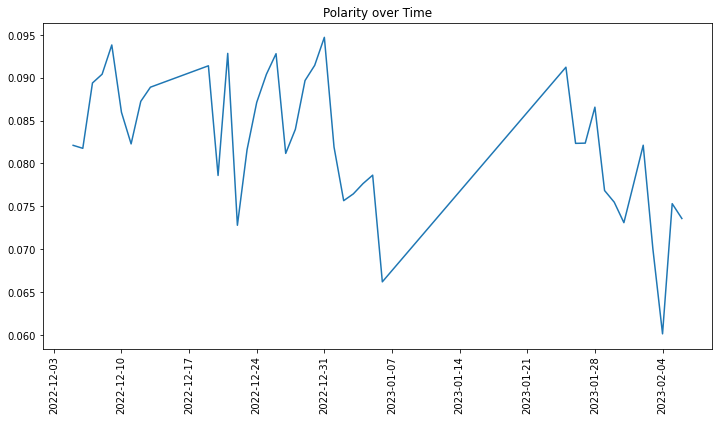

In [164]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(pol_grouped.index, pol_grouped['polarity'])
plt.xticks(rotation=90) 
plt.title('Polarity over Time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

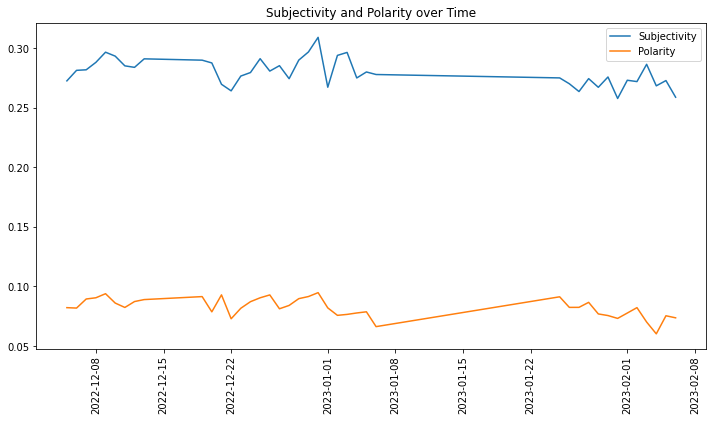

In [165]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sub_grouped.index, sub_grouped['subjectivity'], label='Subjectivity')
plt.plot(pol_grouped.index, pol_grouped['polarity'], label='Polarity')
plt.xticks(rotation=90)
plt.title('Subjectivity and Polarity over Time')
plt.legend()
plt.show()

## Using nltk.sentiment.vader for Sentiment Analysis

In [166]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [167]:
sia = SentimentIntensityAnalyzer()

In [168]:
def vader_sentiment_result(sent):
    scores = sia.polarity_scores(sent)
    if scores['compound'] > 0.05:
      return 1
    elif scores['compound'] < -0.05:
      return -1
    else:
      return 0

In [169]:
df["sentiment_vader"] = df["clean_text"].apply(lambda x: vader_sentiment_result(x))

In [170]:
df.head(5)

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity,sentiment_vader
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06,,0.0,0.00,-1
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06,,0.6,-0.05,0
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06,,0.0,0.00,0
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06,,0.0,0.00,0
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06,,0.0,0.00,0


In [171]:
# mapping the numbers from vader to words
label_map = {1: 'positive', 0: 'neutral', -1: 'negative'}
df['sentiment'] = df['sentiment_vader'].map(label_map)

In [172]:
df.head(5)

,clean_text,clean_hashtags,date,emojis,subjectivity,polarity,sentiment_vader,sentiment
0,chatgpt realli chang shake inform communic sec...,chatgpt,2023-02-06,,0.0,0.00,-1,negative
1,chatgpt anoth woje leftist tool noth tcosvbxpma,chatgpt woje leftist,2023-02-06,,0.6,-0.05,0,neutral
2,unleash entrepreneuri potenti chatgpt power b...,chatgpt busi,2023-02-06,,0.0,0.00,0,neutral
3,chat golgappa papri tikki indian twist thing c...,chatgpt,2023-02-06,,0.0,0.00,0,neutral
4,ai expert made comment bc ckin idea talk fact ...,fact,2023-02-06,,0.0,0.00,0,neutral


In [173]:
counts = df['sentiment'].value_counts()

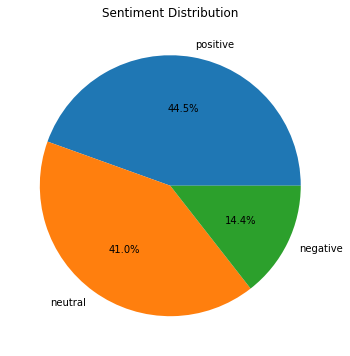

In [174]:
fig, ax = plt.subplots(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', labels=counts.index)
plt.title('Sentiment Distribution')
plt.ylabel("");

=> 

In [175]:
sentiment_grouped = df.groupby('date').agg({'sentiment_vader': 'mean'}) 

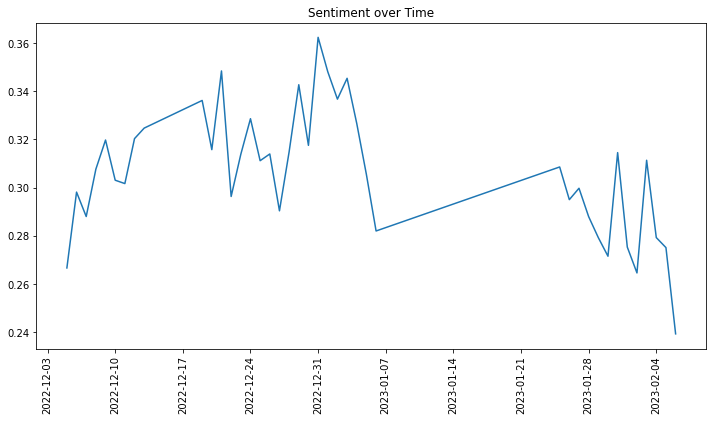

In [176]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sentiment_grouped.index, sentiment_grouped['sentiment_vader'])
plt.xticks(rotation=90) 
plt.title('Sentiment over Time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()

=>

## Using Hugging Face Classifier

The zero-shot-classification (ZSC) model from Hugging Face is a powerful and flexible tool for text classification tasks. It allows you to classify text into any number of categories, without the need to train a model specifically on those categories.

The performance of the ZSC model can vary depending on a number of factors, including the quality of the input data, the complexity of the classification task, and the choice of candidate labels. In general, the ZSC model can achieve high levels of accuracy on many text classification tasks, but may struggle with more nuanced or complex tasks, such as detecting sarcasm or irony.

One advantage of the ZSC model is its flexibility and ease of use. It allows you to quickly and easily classify text data using a pre-trained model, without needing to spend time and resources on model training and optimization. Additionally, the ZSC model can be fine-tuned on specific datasets to improve its performance on specific tasks, if necessary.

Overall, the ZSC model is a powerful and useful tool for many text classification tasks, but its performance will depend on the specific use case and the quality of the input data. It's always a good idea to evaluate the performance of any machine learning model on your specific use case, and to consider the limitations and potential biases of the model.

In [205]:
classifier = pipeline("zero-shot-classification")

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [208]:
tweet_text = df['clean_text'][0]

In [211]:
candidate_labels = ["afraid", "critical", "happy"]
results = classifier(tweet_text, candidate_labels)
print(results)

{'sequence': 'chatgpt realli chang shake inform communic sector could possibl becom reliant uniqu abil forget construct sentencesgrow critic', 'labels': ['critical', 'afraid', 'happy'], 'scores': [0.6802714467048645, 0.27847474813461304, 0.04125381261110306]}


In [ ]:
# deciding on which attributes to take and using the model for the whole dataset

##Analysing the Emojis in the Tweets

In [180]:
emojis = df['emojis']
emojis

0            
1            
2            
3            
4            
         ... 
127881    🙏🙏🙏
127882       
127883       
127884       
127885       
Name: emojis, Length: 127886, dtype: object

In [186]:
emojis.replace('', np.nan, inplace=True)

In [187]:
emojis.isnull().sum()

110663

In [189]:
emojis.dropna(inplace=True)
emojis.reset_index(drop=True, inplace=True)

In [190]:
emojis.isnull().sum()

0

In [191]:
emojis.head()

0    🐋🐳🐋🐳👀
1        🔴
2        😁
3        😏
4        👉
Name: emojis, dtype: object

In [192]:
emojis = emojis.str.split('')
emojis = emojis.explode()

In [193]:
emojis.replace('', np.nan, inplace=True)
emojis.isnull().sum()

34446

In [196]:
emojis.dropna(inplace=True)
emojis.reset_index(drop=True, inplace=True)
emojis

0        🐋
1        🐳
2        🐋
3        🐳
4        👀
        ..
30614    😁
30615    😅
30616    🙏
30617    🙏
30618    🙏
Name: emojis, Length: 30619, dtype: object

In [197]:
# getting the most frequently used emoji
most_common_emoji = emojis.value_counts().index[0]
print('The most frequently used emoji is:', most_common_emoji)

The most frequently used emoji is: 😂


In [198]:
emoji_counts = emojis.value_counts()
emoji_counts.head(10)

😂    2404
👇    2388
🔥    1461
👉    1118
🚀    1082
👀     868
😅     790
🏻     541
😎     482
😉     443
Name: emojis, dtype: int64

In [199]:
# extracting the 10 most used emojis
top_10_emojis = emojis.value_counts().nlargest(10)
emoji_df = pd.DataFrame(top_10_emojis)

In [201]:
fig = px.bar(emoji_df, x=emoji_df.index, y='emojis', text='emojis')

fig.update_layout(title='The 10 most used emojis in the tweets')
fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.update_yaxes(tickvals=[])

fig.show()

##Clustering the text with K-Means

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# assume that your tweet texts are stored in a dataframe column called 'text'
# and you want to cluster them into 5 clusters
n_clusters = 5

# create a vectorizer to convert the tweet texts into numerical features
vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000)

# fit the vectorizer on the tweet texts to learn the vocabulary and transform the texts into numerical features
X = vectorizer.fit_transform(df['clean_text'])

# create a k-means model and fit it on the numerical features
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)

# assign the cluster labels to each tweet text
df['cluster'] = kmeans.labels_

In [ ]:
df